- $\mathbf{X}$: matriz de caracteristicas.

In [85]:
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
plt.style.use("ggplot")

In [36]:
X, _ = make_blobs(n_samples=1000, centers=5, random_state=42, cluster_std=1)

In [37]:
X.shape

(1000, 2)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

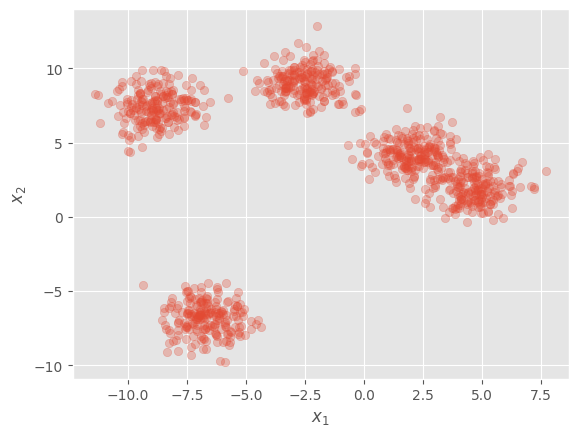

In [38]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

1. Inicializar un valor de $K$.
2. Seleccionar $K$ aleatorios del conjunto de datos como candidatos.
3. Asigno los puntos a su sol mas cercano.
4. Recalculamos los candidatos, como promedio de los puntos en su grupo.
5. Repetir paso 3. por $N$ iteraciones.

In [39]:
X_nums = np.array([
    [0, 1],
    [1, 0.]
])
X_nums

array([[0., 1.],
       [1., 0.]])

In [40]:
euclidean_distances(X_nums, X_nums)

array([[0.        , 1.41421356],
       [1.41421356, 0.        ]])

In [41]:
np.argmax([3, 2, 1, 0, 1])

0

In [42]:
def predict(X: ArrayLike, centroids: ArrayLike) -> ArrayLike:
    """
    X: (N, m)
    centroids: (K, m)
    """
    dists = euclidean_distances(X, centroids) # (N, K)
    assignments = dists.argmin(axis=1)
    return assignments

In [43]:
def kmeans(X: ArrayLike, k: int, n_iters: int) -> ArrayLike:
    # centroid initialization
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    centroids = X[idx[:k]]

    for i in range(n_iters):
        assignments = predict(X, centroids)
        for j in range(k):
            centroids[j] = X[assignments == j].mean(axis=0)
    return centroids

In [44]:
X.shape

(1000, 2)

In [51]:
centroids = kmeans(X, 5, 100)
assignments = predict(X, centroids)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

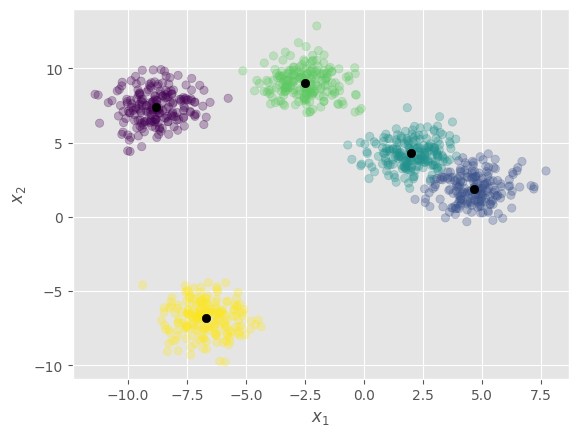

In [52]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=assignments, alpha=0.3)
ax.scatter(centroids[:, 0], centroids[:, 1], c="k")
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [53]:
!wget 'https://i.blogs.es/598f04/charizard/840_560.jpeg' -O img.jpg

--2023-08-18 19:50:20--  https://i.blogs.es/598f04/charizard/840_560.jpeg
Resolving i.blogs.es (i.blogs.es)... 13.35.166.83, 13.35.166.37, 13.35.166.109, ...
Connecting to i.blogs.es (i.blogs.es)|13.35.166.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88261 (86K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  86.19K   189KB/s    in 0.5s    

2023-08-18 19:50:22 (189 KB/s) - ‘img.jpg’ saved [88261/88261]



In [56]:
img = cv2.imread("img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 839.5, 559.5, -0.5)

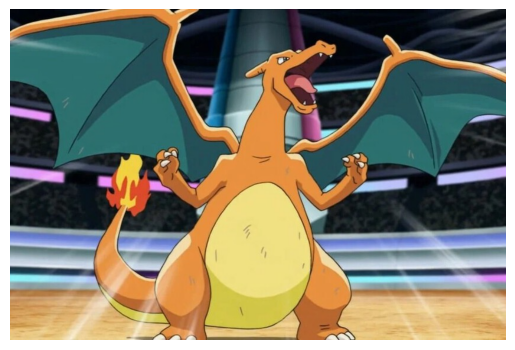

In [58]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")

In [59]:
img.shape

(560, 840, 3)

In [60]:
X = img.reshape(-1, 3)
X.shape

(470400, 3)

In [80]:
model = KMeans(n_clusters=2).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
centroids = model.cluster_centers_
centroids

array([[ 36.31329652,  60.40273836,  64.79651016],
       [204.29930152, 170.43428098, 125.39933448]])

In [82]:
assignments = model.predict(X)

In [83]:
img_centroids = (
    centroids[assignments]
    .reshape(img.shape)
    .astype(np.uint8)
    )

Text(0.5, 1.0, 'Clusters')

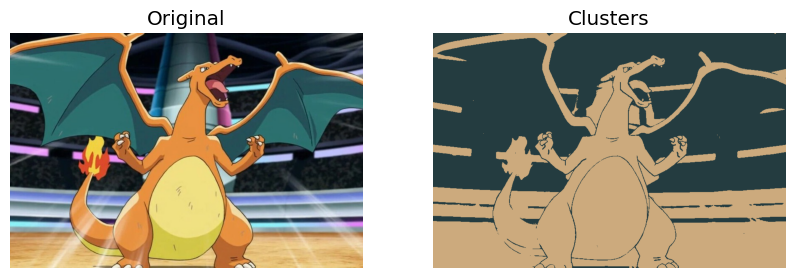

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes[0]
ax.imshow(img)
ax.axis("off")
ax.set_title("Original")

ax = axes[1]
ax.imshow(img_centroids)
ax.axis("off")
ax.set_title("Clusters")

In [86]:
joblib.dump(model, "model.joblib")

['model.joblib']